In [57]:
from data_ingestion import fetch_google_sheet, PUBLIC_SHEET_URL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

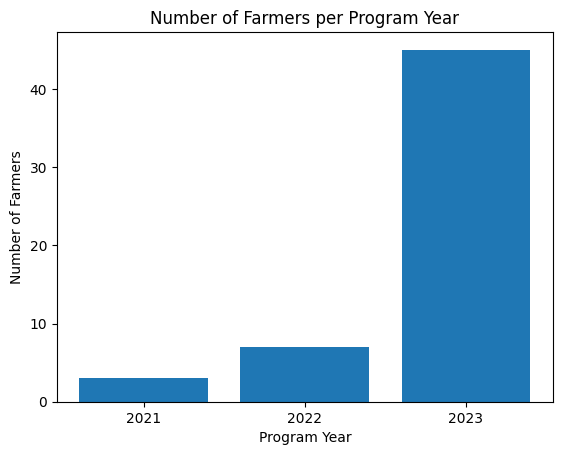

In [70]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Bar chart
ax.bar(yearly_counts.index, yearly_counts.values)

# Force x-axis to show only integer values
ax.set_xticks(yearly_counts.index.astype(int))  
ax.set_xticklabels(yearly_counts.index.astype(str))  # Convert back to string for labels

ax.set_xlabel("Program Year")
ax.set_ylabel("Number of Farmers")
ax.set_title("Number of Farmers per Program Year")

plt.show()



In [64]:
df = fetch_google_sheet(PUBLIC_SHEET_URL)
df.head()

,sr_no,uid,program_year,farmer_name,plantation_type_dense_fruit,total_land_area_acre,area_f4f_acre,District,Block,water_available,...,bhendi,shirish,ain,pimpal,vad,tamhan,waval,palas,babhul,bakul
0,1,id_1,2023,farmer_b,Fruit Tree,5,4,A,p,Yes,...,1,0,1,1,1,0,0,1,0,1
1,2,id_2,2023,farmer_c,Fruit Tree,5,30,A,p,Yes,...,1,0,1,1,1,1,0,0,0,1
2,3,id_3,2023,farmer_d,Fruit Tree,7,5,A,p,Yes,...,0,2,0,3,0,0,3,3,0,3
3,4,id_4,2023,farmer_e,Fruit Tree,9,4,A,p,Yes,...,0,4,0,4,0,0,3,3,0,4
4,5,id_5,2023,farmer_f,Fruit Tree,7,4,A,p,Yes,...,3,3,3,0,0,3,0,3,0,3


In [12]:
PUBLIC_SHEET_URL

'https://docs.google.com/spreadsheets/d/1P2M9_wVO5rcy4Hp8CNyKwJXs4Dwi-roea8TbmnCcU1A/gviz/tq?tqx=out:csv'

In [3]:
df[df["uid"].isnull() | df["uid"].duplicated()]

,sr_no,uid,program_year,farmer_name,plantation_type_dense_fruit,total_land_area_acre,area_f4f_acre,District,Block,water_available,...,bhendi,shirish,ain,pimpal,vad,tamhan,waval,palas,babhul,bakul


In [5]:
df.index

2

In [8]:
mandatory_fields = ["uid", "farmer_name", "program_year"]
missing_values = df[mandatory_fields].isnull().sum()
missing_fields = missing_values[missing_values > 0]
if not missing_fields.empty:
    missing_data = df[df[mandatory_fields].isnull().any(axis=1)]

missing_fields

Series([], dtype: int64)

In [41]:
data = {
            "uid": [1, 2, 3],
            "farmer_name": ["John", "Alex", "Sam"],
            "program_year": ["2023", "2023", "2024"],
            "total_land_area_acre": [5, 10, -1],
            "land area in acre which farmers want to do Plantation with F4f": [3, 5, 6],
            "Status of KML Uploaded": ["Yes", "No", "Yes"],
            "Status of contract uploaded": ["Yes", "Yes", "No"],
            "Status of land_record_uploaded": ["Yes", "Yes", "No"],
            "Status of cc_training document uploaded": ["Yes", "Yes", "Yes"],
            "cc_training_date": ["2023-01-01", "2023-02-01", "2023-03-01"],
            "farmer_payment_collected": ["Yes", "No", "Yes"],
            "farmer_payment_date": ["2023-01-01", "2023-02-01", "2023-03-01"],
            "amount": [1000, 500, 700],
            "mode_collection_cash_upi_banktransfer": ["Cash", "UPI", "Bank Transfer"],
            "contract_date": ["2023-01-01", "2023-02-01", "2023-03-01"],
            "baseline_survey": ["Yes", "Yes", "No"],
            "plantation_date": ["2023-02-01", "2023-03-01", "2023-04-01"],
            "trees_planted": [400, 500, 600],
            "mango_native": [100, 200, 300]
        }
test = pd.DataFrame(data)

In [11]:
df["area_f4f_acre"] 

0      4
1     30
2      5
3      4
4      4
5      4
6      5
7      1
8      1
9      5
10     1
11     1
12     5
13     1
14     2
15     5
16     3
17     1
18     4
19     1
20     8
21     4
22     4
23     5
24     5
25     3
26     1
27     3
28     2
29     5
30     3
31     5
32     2
33     1
34     1
35     3
36     4
37     1
38     2
39     4
40     1
41     4
42     2
43     3
44     4
45     3
46     5
47     4
48    12
49     5
50     1
51     4
52     4
53     4
54     2
Name: area_f4f_acre, dtype: int64

In [ ]:
species_cols = ["mango_native", "lemon_sai_sharbati", "sitaphal_golden", "awala", "peru"]

In [78]:
species_columns = [
    "mango_native", "mango_grafted_kesar", "lemon_sai_sharbati", "sitaphal_native", 
    "sitaphal_golden", "sitaphal _balanagar", "awala", "awala_grafted", "peru", 
    "peru_sardar", "chincha", "chincha_grafted", "Jamun", "Jamun_bhardoli", 
    "chikku", "orange", "mosambi", "dalimb", "ramphal", "drumstick_Koimb", 
    "bamboo", "karwand", "arjun", "katesawar", "karanj", "kaduneem", "kanchan", 
    "kadamb", "bhendi", "shirish", "ain", "pimpal", "vad", "tamhan", "waval", 
    "palas", "babhul", "bakul"
]



In [88]:
df[df[species_columns].sum(axis=1) != df["trees_planted"]].count()

sr_no                          29
uid                            29
program_year                   29
farmer_name                    29
plantation_type_dense_fruit    29
                               ..
tamhan                         29
waval                          29
palas                          29
babhul                         29
bakul                          29
Length: 64, dtype: int64

In [80]:
df[species_columns].sum().sort_values(ascending=False)

bamboo                 25834
sitaphal_golden         3835
lemon_sai_sharbati      1585
mango_grafted_kesar     1490
Jamun                    510
sitaphal_native          478
chincha                  411
sitaphal _balanagar      300
peru                     292
peru_sardar              270
mango_native             233
awala                    190
arjun                    137
karanj                    77
kaduneem                  73
karwand                   63
bhendi                    62
kanchan                   57
palas                     50
tamhan                    48
katesawar                 48
shirish                   28
Jamun_bhardoli            25
bakul                     22
kadamb                    17
ain                       16
pimpal                    13
waval                     10
vad                        3
babhul                     1
ramphal                    0
drumstick_Koimb            0
mosambi                    0
dalimb                     0
orange        

In [20]:
df[df["trees_planted"] == df[species_columns].sum(axis=1)]

,sr_no,uid,program_year,farmer_name,plantation_type_dense_fruit,total_land_area_acre,area_f4f_acre,District,Block,water_available,...,bhendi,shirish,ain,pimpal,vad,tamhan,waval,palas,babhul,bakul
4,5,id_5,2023,farmer_f,Fruit Tree,7,4,A,p,Yes,...,3,3,3,0,0,3,0,3,0,3
6,7,id_7,2023,farmer_h,Fruit Tree,6,5,A,p,Yes,...,2,3,3,0,0,3,0,3,0,3
7,8,id_8,2023,farmer_i,Fruit Tree,5,1,A,p,Yes,...,0,2,4,0,0,4,0,4,0,4
8,9,id_9,2023,farmer_j,Fruit Tree,6,1,A,p,Yes,...,0,1,0,2,0,0,1,1,0,2
9,10,id_10,2023,farmer_k,Fruit Tree,9,5,A,p,Yes,...,0,1,0,1,0,0,2,1,0,1
11,12,id_12,2023,farmer_m,Fruit Tree,8,1,A,p,Yes,...,0,0,0,0,0,5,0,5,0,0
12,13,id_13,2023,farmer_n,Fruit Tree,9,5,A,p,Yes,...,0,1,0,0,0,1,0,1,0,0
13,14,id_14,2023,farmer_o,Fruit Tree,8,1,A,p,Yes,...,0,0,0,0,0,5,0,5,0,0
15,16,id_16,2023,farmer_q,Fruit Tree,9,5,A,q,Yes,...,0,0,3,0,0,3,0,3,0,0
16,17,id_17,2023,farmer_r,Fruit Tree,9,3,A,q,Yes,...,0,3,0,0,0,3,0,3,0,0


In [23]:
df["Block"].unique()

array(['p', 'q', 'r', 's'], dtype=object)

In [43]:
pd.to_datetime(df["farmer_payment_date"], format="%Y-%m-%d")

ValueError: time data "31-Jun-2023" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [24]:
df["farmer_payment_date"]

0     31-Jun-2023
1        7-Mar-23
2       25-Jul-23
3       17-Jul-23
4        1-Jul-23
5       27-Jun-23
6        1-Jul-23
7       23-Jun-23
8       29-May-23
9       29-May-23
10      17-Jul-23
11       1-Jul-23
12      27-Jun-23
13      17-Jul-23
14       1-Jul-23
15      27-Jun-23
16      17-Jul-23
17       1-Jul-23
18      27-Jun-23
19      17-Jul-23
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28            NaN
29            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
37            NaN
38            NaN
39            NaN
40            NaN
41            NaN
42            NaN
43            NaN
44            NaN
45            NaN
46            NaN
47            NaN
48            NaN
49            NaN
50            NaN
51            NaN
52            NaN
53            NaN
54            NaN
Name: farm

In [27]:
mandatory_fields = ["uid", "farmer_name", "program_year"]
missing_values = df[mandatory_fields].isnull().sum()
missing_fields = missing_values[missing_values > 0]

In [29]:
missing_values

uid             0
farmer_name     0
program_year    0
dtype: int64

In [46]:
from datetime import datetime
def check_date_columns(df):
    """Check for invalid date formats in date columns. Allow NaN but remove invalid formats."""
    date_columns = [
        "farmer_payment_date", "contract_date", "plantation_date", "cc_training_date"
    ]

    for col in date_columns:
        if col in df.columns:
            invalid_rows = []
            
            for index, value in df[col].items():
                if pd.isna(value):  # Allow NaN values
                    continue
                
                try:
                    # Attempt to parse the date, assuming a common format (DD-MMM-YYYY or DD-MM-YY)
                    datetime.strptime(str(value), "%d-%b-%y")  # Example: 31-Jul-2023
                except ValueError:
                    try:
                        datetime.strptime(str(value), "%d-%m-%y")  # Example: 07-03-23
                    except ValueError:
                        invalid_rows.append(index)

            if invalid_rows:
                print(f"Invalid date format detected in '{col}': Rows {invalid_rows}")
                

check_date_columns(df)

Invalid date format detected in 'farmer_payment_date': Rows [0]


In [53]:
datetime.strptime(str("30-Jul-2023"), "%d-%b-%Y")

datetime.datetime(2023, 7, 30, 0, 0)

In [52]:
from datetime import datetime

# Correct way using str method for string conversion
date_string = str("30-Jul-2023")  # This ensures it's a string
parsed_date = datetime.strptime(date_string, "%d-%b-%Y")
print(parsed_date)


2023-07-30 00:00:00
